## Домашняя работа №1 Part1
Вам предстоит:

Написать персептрон с двумя слоями. Реализовать форвард и бэквард пропогейшен



In [1]:
import numpy as np
from sklearn.metrics import classification_report
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import time

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [3]:
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

In [4]:
#фильтруем фичи (дата) по значению классификационных лэйблов (таргет), берем или цифру 3 или цифру 7
train_dataset.data = train_dataset.data[(train_dataset.targets == 3) | (train_dataset.targets == 7)]
train_dataset.targets = train_dataset.targets[(train_dataset.targets == 3) | (train_dataset.targets == 7)]
#тоже самое для тестового набора
test_dataset.data = test_dataset.data[(test_dataset.targets == 3) | (test_dataset.targets == 7)]
test_dataset.targets = test_dataset.targets[(test_dataset.targets == 3) | (test_dataset.targets == 7)]

train_dataset.targets = (train_dataset.targets == 7).long()
test_dataset.targets = (test_dataset.targets == 7).long()

In [5]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [6]:
X, y = next(iter(train_loader)) #next(iter(x) - Возвращает следующий элемент итератора.

In [7]:
X, y = next(iter(train_loader))
X = X.view(X.shape[0], -1)
X.shape

torch.Size([128, 784])

In [8]:
w = torch.rand(784, 1) #Рандомные необученые веса
pred = X.matmul(w)
pred.shape

torch.Size([128, 1])

In [9]:
y = np.expand_dims(y, 1)

Итерация по эпохам

In [10]:
epochs = 3

for n_epoch in range(epochs):  
    dataset_passed_samples = 0
    
    for x, y in train_loader:
        # вот здесь мы могли бы как-то манипулировать с данными, например, учить, но пока этого делать не будет
        time.sleep(0.05)
        dataset_passed_samples += x.shape[0]
        dataset_passed_percent = dataset_passed_samples * 100 / train_loader.dataset.data.shape[0]
        
        print(f'Эпоха - {n_epoch + 1}, прошли - {dataset_passed_percent:.2f} % датасета', end='\r')
        
    print('\r')

Эпоха - 1, прошли - 100.00 % датасета
Эпоха - 2, прошли - 100.00 % датасета
Эпоха - 3, прошли - 100.00 % датасета


# Однослойный персептрон

In [11]:
learning_rate = 0.01 
epochs = 5  
batch_size = 128  
n_feat = 784

w1 = np.random.rand(n_feat,1)*0.01 
b1 = np.zeros(1) #размерность должна совпадать с количеством параметров, которые у нас останутся после матричного перемножения
losses = [] 

for n_epoch in range(epochs):
    
    print(f'Epoch: {n_epoch + 1}')
    
    for x, y in train_loader:

        x = x.view(x.shape[0], -1).numpy() #(128,784)
        y = np.expand_dims(y.numpy(), 1) #(128,1)

        h1 = x.dot(w1) + b1 #переход в одномерное пространство
        p = 1/(1+np.exp(-h1)) #преобразование в "вероятности"
        
        bce = (-np.sum(np.multiply(np.log(p), y) + np.multiply((1 - y), np.log(1 - p)))) / batch_size 
        #расчет энтропии с усреднением по размеру бача
          
        losses.append(bce) 
        #ниже производная bce и sigmoid, если вы распишите две этих производные, перемножите и сократите, то полчится следующая строчка
        dp = (p - y) / batch_size 
        dw1 = np.dot(x.T, dp) # производная по линейному преобразванию, относительно W - весов 
        db1 = np.sum(dp) # производная по лин преобразованиюб относительно В - баяса, 
        #здесь по идее должно быть перемножение на единичный вектор (128,1), но это тоже самое что и сумма значениеб типа лайф хак
        
        w1 -= learning_rate * dw1 # Обновим веса и баясы 
        b1 -= learning_rate * db1

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5


А теперь построим график функции потерь

Text(0, 0.5, 'Loss function')

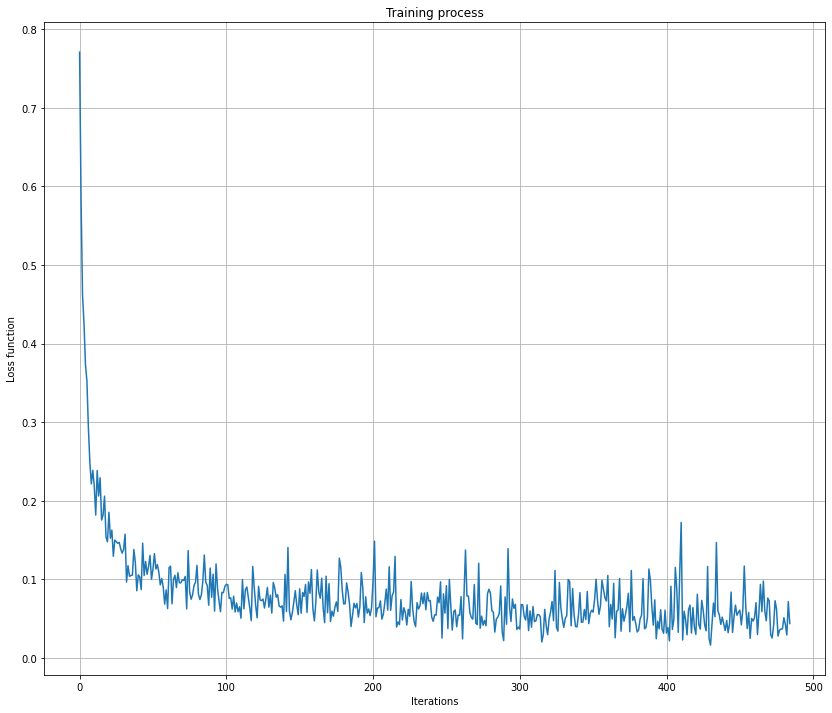

In [12]:
plt.figure(figsize=(14, 12))
plt.plot(losses)
plt.grid()
plt.title('Training process')
plt.xlabel('Iterations')
plt.ylabel('Loss function')

А теперь ваша очередь, нужно написать двуслоный персептрон, согласно коду и выкладкам выше

In [13]:
from torch import nn

In [14]:
pad_value = 1
pad_func = nn.ConstantPad1d((0, 1), pad_value)

In [76]:

learning_rate = 0.3
epochs = 8
losses = []
cr = 1
w1 = np.random.rand(n_feat+1,1)*0.01
w2 = np.random.rand(1,1)*0.01
b2 = np.zeros(1)*0.01

for n_epoch in range(epochs):
    print(f'Epoch: {n_epoch + 1}')
    
    for x, y in train_loader:

        x = pad_func(x.view(x.shape[0], -1)).numpy()  # добавила 1 чтобы считать первый bias как w
        y = np.expand_dims(y.numpy(), 1)
        ones_col = np.ones(x.shape[0]).reshape(-1, 1)

        z1 = x.dot(w1) # (128, 1)
        a1 = 1/(1+np.exp(-z1))            
        z2 = a1.dot(w2) + b2
        a2 = 1/(1+np.exp(-z2))

        loss = (-np.sum(np.multiply(np.log(a2), y) + np.multiply((1 - y), np.log(1 - a2)))) / batch_size
        losses.append(loss)

        d_loss_p = -1*((a2-y)/(a2**2-a2))
        d_p_z2 = (np.exp(z2)/(np.exp(2*z2)+(2*np.exp(z2))+ 1))
        d_loss_w2 = np.dot(a2.T, (d_loss_p*d_p_z2)) / batch_size
        d_loss_b2 = np.sum(d_loss_p*d_p_z2) / batch_size

        d_a1_z1 = (np.exp(z1)/(np.exp(2*z1)+(2*np.exp(z1))+ 1))
        d_loss_w1 = np.dot(x.T, np.dot((d_loss_p*d_p_z2), w2.T)*d_a1_z1)



        w2 -= learning_rate*d_loss_w2
        b2 -= learning_rate*d_b2
        w1 -= learning_rate*d_loss_w1

            

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6


C:\Users\Polina\AppData\Local\Temp\ipykernel_16052\2228527840.py:31: RuntimeWarning: overflow encountered in exp
  d_a1_z1 = (np.exp(z1)/(np.exp(2*z1)+(2*np.exp(z1))+ 1))


Epoch: 7
Epoch: 8


In [77]:
losses[-1]

0.10873942778599395

**l2-норма для w1, чтобы сравнить модели с регуляризацией и без**

In [78]:
print(np.linalg.norm(w1))

35.73372834463584


Text(0, 0.5, 'Loss function')

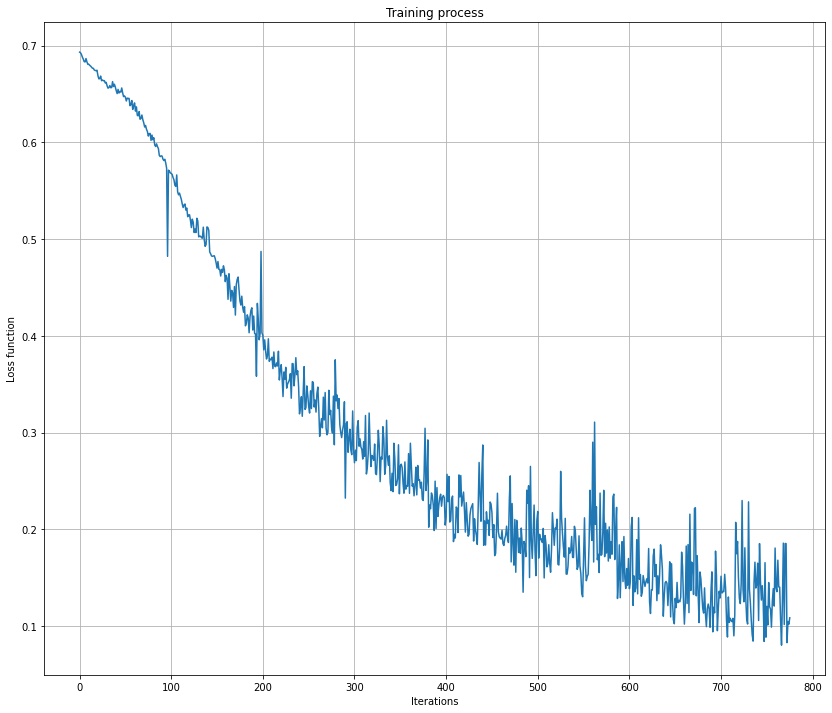

In [79]:
plt.figure(figsize=(14, 12))
plt.plot(losses)
plt.grid()
plt.title('Training process')
plt.xlabel('Iterations')
plt.ylabel('Loss function')

## Подсказки по размерностям

### Forward

- z1 - первое линейное преобразование - (BATCH_SIZE, INNER_FEATURES)
- a1 - Применение нелинейности - (BATCH_SIZE, INNER_FEATURES)
- z2 - второе нелинейное преобразование - (BATCH_SIZE, 1)
- pred or A2- сигмоида - (BATCH_SIZE, 1)
- loss - функция потерь - скаляр

### Backward

- d_BCE/d_pred - градиент функции потерь по pred - (BATCH_SIZE, 1)
- d_pred/dz2 - градиент сигмоиды по z2 - (BATCH_SIZE, 1)
- dz2/da1 - градиент линейного преобразования по a1 - (BATCH_SIZE, INNER_FEATURES)
- dz2/dw2 - градиент линейного преобразования по w2 - (INNER_FEATURES, 1)
- dz2/db2 - градиент линейного преобразования по b2 - (1,)
- da1/dz1 - градиент нелинейной функции по z1 - (BATCH_SIZE, INNER_FEATURES)
- dz1/dw1 - градиент линейного преобразования по w1 - (IN_FEATURES, INNER_FEATURES)
- dz1/db1 - градиент линейного преобразования по b1 - (INNER_FEATURES,)

## +Регуляризация на w1

In [72]:
reg_coef = 0.01
learning_rate = 0.3
epochs = 8
losses = []
cr = 1
w1 = np.random.rand(n_feat+1,1)*0.01
w2 = np.random.rand(1,1)*0.01
b2 = np.zeros(1)*0.01

for n_epoch in range(epochs):
    print(f'Epoch: {n_epoch + 1}')
    
    for x, y in train_loader:

        x = pad_func(x.view(x.shape[0], -1)).numpy()  # добавила 1 чтобы считать первый bias как w
        y = np.expand_dims(y.numpy(), 1)
        ones_col = np.ones(x.shape[0]).reshape(-1, 1)

        z1 = x.dot(w1) # (128, 1)
        a1 = 1/(1+np.exp(-z1))            
        z2 = a1.dot(w2) + b2
        a2 = 1/(1+np.exp(-z2))

        loss = (-np.sum(np.multiply(np.log(a2), y) + np.multiply((1 - y), np.log(1 - a2))) / batch_size
                + reg_coef*np.linalg.norm(w1[:-1]))   # теперь надо убрать bias из регуляризации
        
        losses.append(loss)

        d_loss_p = -1*((a2-y)/(a2**2-a2))
        d_p_z2 = (np.exp(z2)/(np.exp(2*z2)+(2*np.exp(z2))+ 1))
        d_loss_w2 = np.dot(a2.T, (d_loss_p*d_p_z2)) / batch_size
        d_loss_b2 = np.sum(d_loss_p*d_p_z2) / batch_size

        d_a1_z1 = (np.exp(z1)/(np.exp(2*z1)+(2*np.exp(z1))+ 1))
        reg_w1 = np.append(w1[:-1], 0)
        d_loss_w1 = np.dot(x.T, np.dot((d_loss_p*d_p_z2), w2.T)*d_a1_z1)
        reg_d = np.expand_dims(2*reg_coef*reg_w1, 1)
        d_loss_w1 += reg_d

        w2 -= learning_rate*d_loss_w2
        b2 -= learning_rate*d_b2
        w1 -= learning_rate*d_loss_w1

            

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8


In [73]:
losses[-1]

0.42798875161762984

In [75]:
print(np.linalg.norm(w1))

23.400742888283393


**l2-норма w1 действительно уменьшилась, но это не улучшило качество. Вероятно, модель без регуляризация сама по себе не была переобученной**

Text(0, 0.5, 'Loss function')

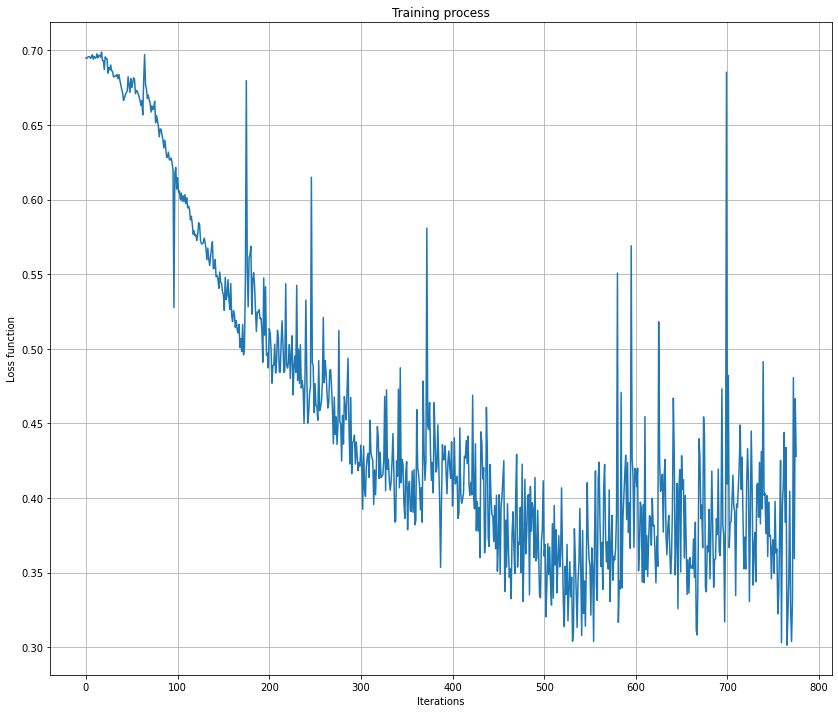

In [74]:
plt.figure(figsize=(14, 12))
plt.plot(losses)
plt.grid()
plt.title('Training process')
plt.xlabel('Iterations')
plt.ylabel('Loss function')